**Problema 2 : Caso Practico Examen Final**


## Integrantes:
* Cabezas Gutiérrez Cristhian Fabián
* Calle Revelo Gustavo John
* Gaibor Rojas Sonia Marlene
* Muñoz Montenegro Miguel Fernando

## Tutor:
* Stalin Arroyabe Merchán

**# Enunciado del caso práctico**

En el archivo csv_crime_data.csv se muestra el número de crímenes por cada 100 000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población urbana. Los crímenes se han agrupado en asalto, asesinato y violación.

**Se pide:**

Segmentar el conjunto de datos utilizando *k-means* para obtener los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

In [ ]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


**Importacion de archivo csv_crime_data.csv**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileDownloaded = drive.CreateFile({'id':'1EqW4lih4BRLWxGDJhWxng-zWfJ380BbN'})

fileDownloaded.GetContentFile('csv_crime_data.csv')

**En el archivo csv_crime_data.csv se muestra el número de crímenes por cada 100 000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población urbana. Los crímenes se han agrupado en asalto, asesinato y violación.Para resolver el problema en primer lugar se carga el archivo con pandas.**

In [ ]:
import pandas as pd

data_crime = pd.read_csv('csv_crime_data.csv', sep = ',' , index_col=0)
data_crime.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**Este data set contiene datos estadisticos por cada 100.000 habitantes , de asaltos, muertes y violaciones en los 50 estados de Norteamerica , ademas del porcentaje de habitantes que viven en areas urbanas de estos estados**

In [ ]:
data_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Procedemos a Normalizar los datos, previo a su clasificacion**

In [ ]:
from sklearn import preprocessing

data_crime_standard = preprocessing.scale(data_crime)
print(data_crime_standard)
data_crime_standard = pd.DataFrame(data_crime_standard)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

**Utilizamos el metodo del codo o dispersion para encontrar el numero adecuado de clusters en que se divide nuestro data set**

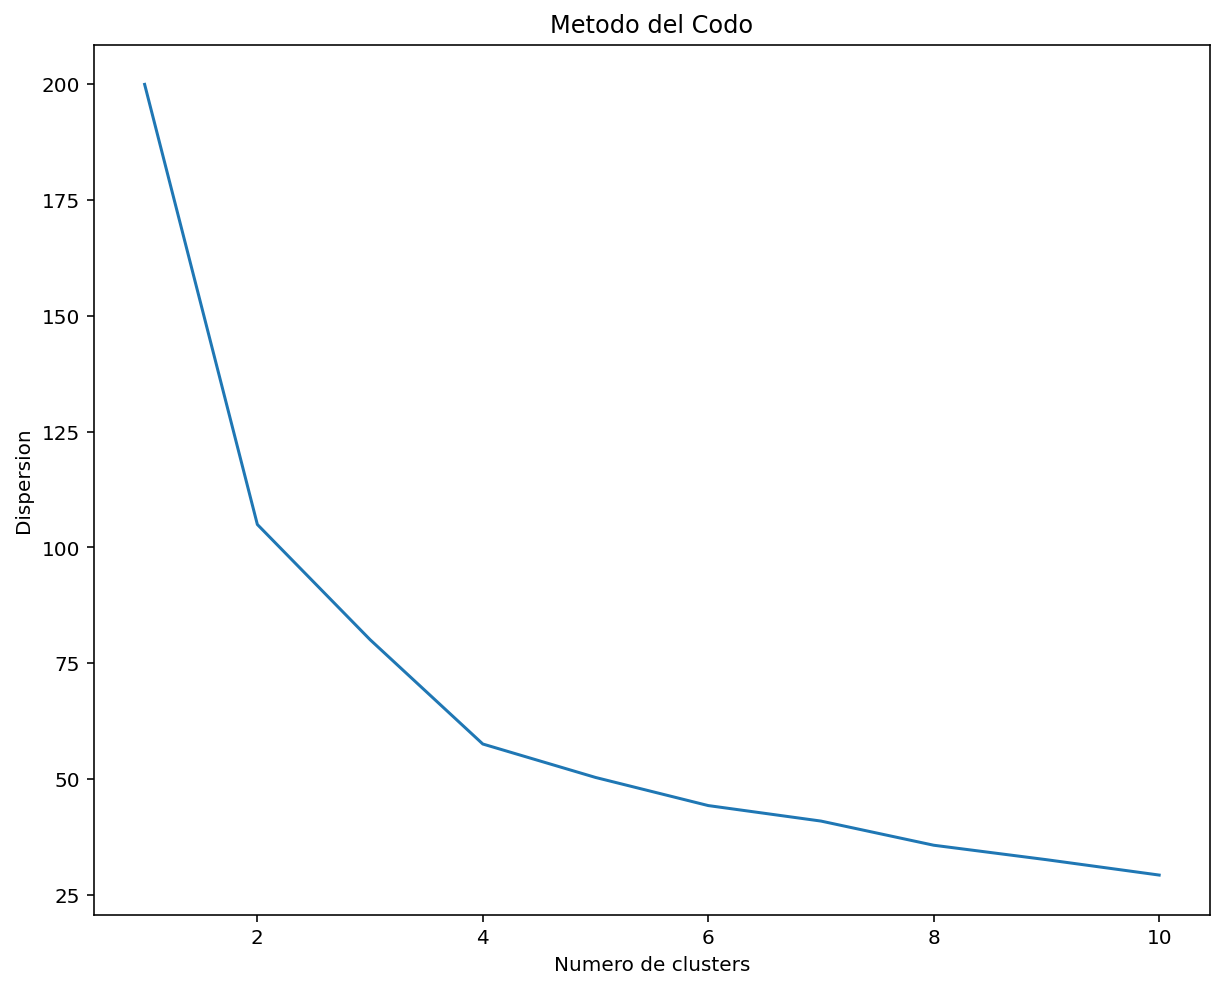

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_crime_standard)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del Codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Dispersion')
plt.show()

**Por la grafica anterior se puede observar que el numero adecuado de Clusters para entrenar es k=4 , donde la grafica encuentra se establiza en su descenso**

**Determinamos en que cluster debe caer cada estado, utilizando los 4 clusters sugeridos**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_crime_standard)

y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

**A continuacion agregamos a nuestro DataSet original una columna para identificar en que cluster se clasifica cada estado (State)**

In [ ]:
#Renombramos los clusters, para que se identifiquen con numeros del 1 al 4
y_kmeans3=y_kmeans+1

# Agregamos una nueva columna llamada Cluster a nuestro Data Set
clust = list(y_kmeans3)
#print(clust)
# Adicionamos el numero de Cluster a nuestro Data Set inicial, con esto identificamos en que cluster se agrupa cada Estado (State)
data_crime['Cluster'] = clust

by_clust = data_crime.sort_values('Cluster')
by_clust.head(60)

,Murder,Assault,UrbanPop,Rape,Cluster
State,,,,,
Wyoming,6.8,161,60,15.6,1
New Jersey,7.4,159,89,18.8,1
Kansas,6.0,115,66,18.0,1
Ohio,7.3,120,75,21.4,1
Indiana,7.2,113,65,21.0,1
Oklahoma,6.6,151,68,20.0,1
Oregon,4.9,159,67,29.3,1
Hawaii,5.3,46,83,20.2,1
Pennsylvania,6.3,106,72,14.9,1


**A continuacion mostramos un grafico de las variables (Muertes vs Asaltos) en su distribucion entre los 4 clusters**

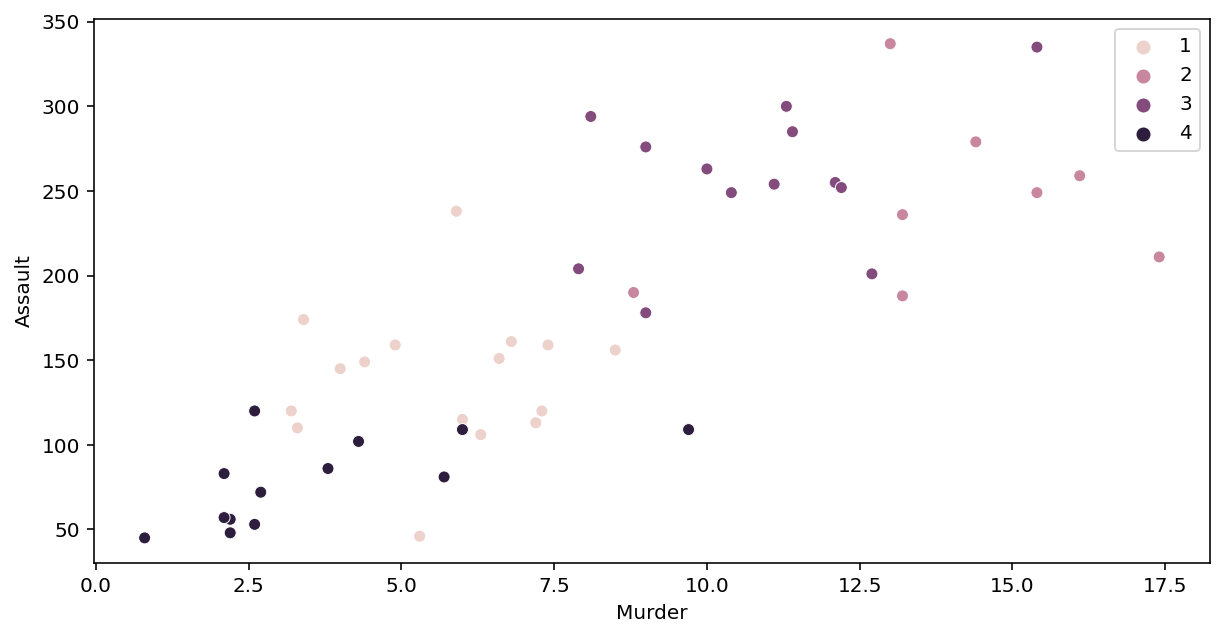

In [ ]:
import seaborn as sns

#color_map = np.array(['b','g','r','c'])

plt.figure(figsize=(10,5))
sns.scatterplot(x=data_crime['Murder'], y = data_crime['Assault'],hue=y_kmeans3)
#sns.scatterplot(x=data_crime['Murder'], y = data_crime['Rape'],hue=y_kmeans3)
#sns.scatterplot(x=data_crime['Assault'], y = data_crime['UrbanPop'],hue=y_kmeans3)

**NUEVO DATA SET : Agregamos un nuevo set de datos**

In [ ]:
from pandas.io.parsers.readers import is_index_col
import pandas as pd

#NUEVO SET DE DATOS QUE SE AGREGAN AL ARCHIVO ORIGINAL
new_filas = {'State':['Guayaquil','Quito','Cuenca','Ambato','Portoviejo','Machala'],
              'Murder':[7.1,6.5,6,5.8,8.2,7.2],
              'Assault':[164,168,180,150,148,165],
              'UrbanPop':[58,50,60,65,59,70],
              'Rape':[14,17,13,18,12,11]}
data_crime = pd.read_csv('csv_crime_data.csv', sep = ',')
df1 = pd.DataFrame(data_crime)
df2 = pd.DataFrame(new_filas)
df_concat=pd.concat([df1,df2])
new_df_col = list(df_concat.columns)
#REMOVEMOS LA COLUMNA NO NUMERICA (STATE)
new_df_col.remove('State')
df3 = df_concat[new_df_col]
df3.head(60)


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


**Normalizamos el nuevo DataFrame**

In [ ]:
#Removemos la columna que no es numerica

#new_df_col = list(new_df.columns) 
#new_df_col.remove('State')

#Creamos un nuevo DataFrame
#df_new_data = new_df[new_df_col]

#Normalizamos los datos del nuevo DataFrame
new_dcs = preprocessing.scale(df3)
print(new_dcs)
new_dcs = pd.DataFrame(new_dcs)


[[ 1.34770840e+00  8.46904072e-01 -5.06514505e-01  7.99498973e-02]
 [ 5.66124758e-01  1.19270989e+00 -1.23195727e+00  2.64937418e+00]
 [ 1.02059471e-01  1.58974621e+00  1.08945959e+00  1.16065196e+00]
 [ 2.73030892e-01  2.57753413e-01 -1.08686872e+00 -1.07518827e-01]
 [ 3.21879870e-01  1.35920899e+00  1.88744663e+00  2.21929887e+00]
 [ 5.32104934e-02  4.37060136e-01  9.44371034e-01  2.00977500e+00]
 [-1.07031599e+00 -7.66856429e-01  8.71826757e-01 -1.03383488e+00]
 [-4.35279282e-01  8.72519318e-01  5.09105372e-01 -5.15538993e-01]
 [ 1.88504715e+00  2.11485875e+00  1.08945959e+00  1.25990011e+00]
 [ 2.37353693e+00  5.26713497e-01 -3.61425951e-01  5.87218211e-01]
 [-5.81826215e-01 -1.58654430e+00  1.30709242e+00 -3.03258231e-02]
 [-1.24128741e+00 -6.38780198e-01 -7.96691613e-01 -6.91980145e-01]
 [ 6.63822713e-01  1.01340317e+00  1.30709242e+00  3.88721914e-01]
 [-1.17760928e-01 -7.28433559e-01  1.29543352e-03  5.78947532e-02]
 [-1.33898537e+00 -1.45846807e+00 -5.79058782e-01 -1.01177973e

CALCULO DE CLUSTERS OPTIMO

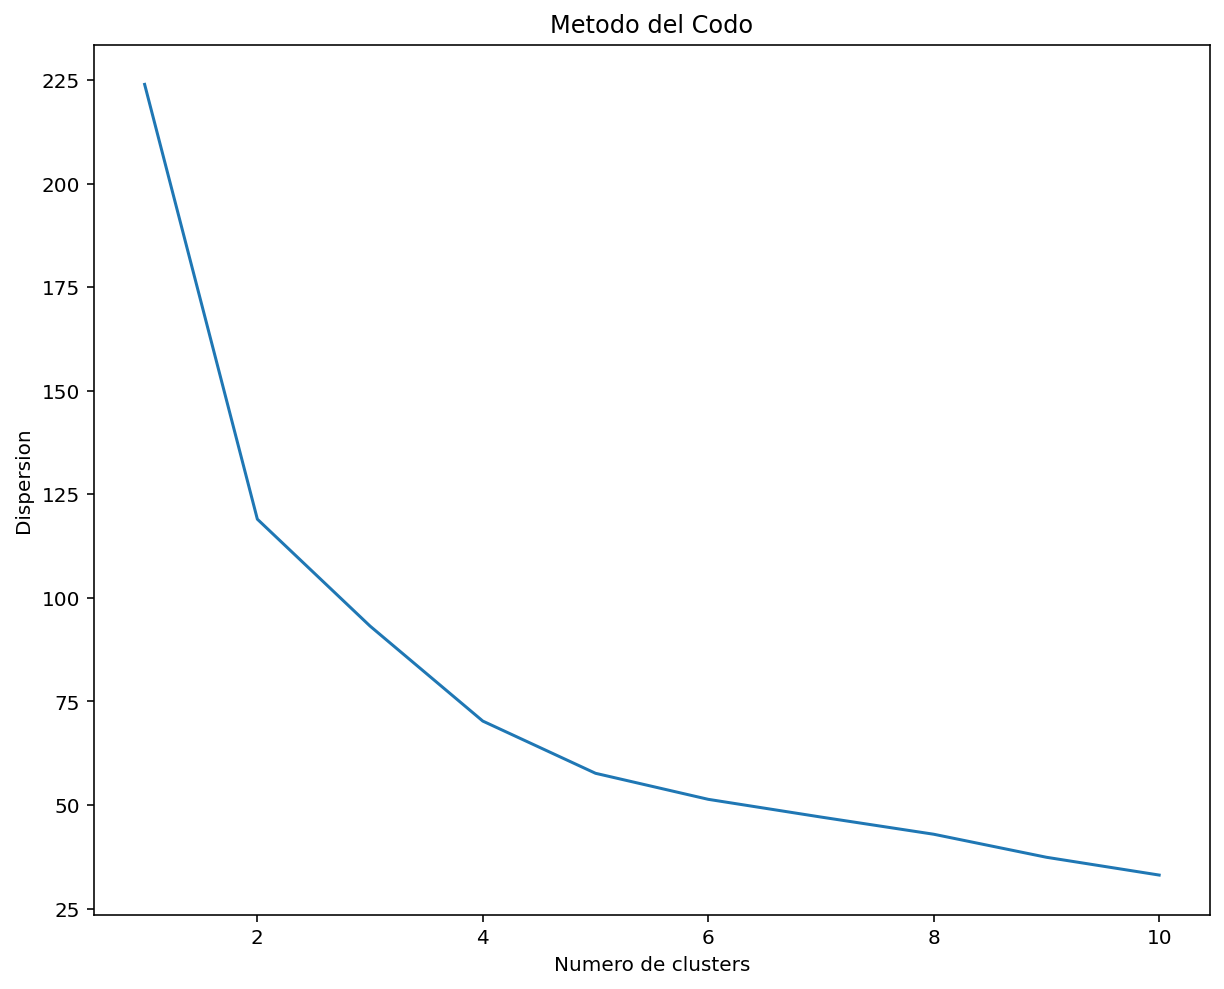

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_dcs)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metodo del Codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Dispersion')
plt.show()

**Determinamos en que Cluster cae el nuevo set de datos**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_dcs)

y_kmeans

array([1, 3, 3, 2, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 2, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 2, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

**Determinanos en que Cluster caen los nuevos datos**

In [ ]:
#Renombramos los clusters, para que se identifiquen con numeros del 1 al 4
y_kmeans3=y_kmeans+1

# Agregamos una nueva columna llamada Cluster a nuestro Data Set
clust = list(y_kmeans3)
# Adicionamos el numero de Cluster a nuestro Data Set inicial, con esto identificamos en que cluster se agrupa cada Estado (State)
df_concat['Cluster'] = clust

by_clust = df_concat.sort_values('Cluster')
by_clust.head(60)

,State,Murder,Assault,UrbanPop,Rape,Cluster
28,New Hampshire,2.1,57,56,9.5,1
25,Montana,6.0,109,53,16.4,1
22,Minnesota,2.7,72,66,14.9,1
48,Wisconsin,2.6,53,66,10.8,1
47,West Virginia,5.7,81,39,9.3,1
18,Maine,2.1,83,51,7.8,1
40,South Dakota,3.8,86,45,12.8,1
11,Idaho,2.6,120,54,14.2,1
44,Vermont,2.2,48,32,11.2,1
33,North Dakota,0.8,45,44,7.3,1


**CONCLUSIONES : Con nuevo set de datos de 6 ciudades que se agregan al archivo original y el mismo numero Clusters, se evidencia que varias ciudades como por ejemplo Kansas y Ohio cambiaron su ubicacion del Cluster 1 al 3 , lo que hace suponer que la Dispersion en el modelo es bastante grande**